In [21]:
import pandas as pd
import matplotlib.pyplot as plt


In [16]:
steadyData = pd.read_excel('/Users/mchetan/Library/CloudStorage/OneDrive-NREL/Projects/storm/AllLoads.xlsx',sheet_name='newSims-stable', header = [0,1])
unsteadyData = pd.read_excel('/Users/mchetan/Library/CloudStorage/OneDrive-NREL/Projects/storm/AllLoads.xlsx',sheet_name='newSims-unstable', header = [0,1])


Typhoondamped = pd.read_excel('/Users/mchetan/Library/CloudStorage/OneDrive-NREL/Projects/storm/AllLoads.xlsx',sheet_name='Typhoon-damped', header = [0,1])
# unsteadyData = pd.read_excel('/Users/mchetan/Library/CloudStorage/OneDrive-NREL/Projects/storm/AllLoads.xlsx',sheet_name='newSims-unstable', header = [0,1])

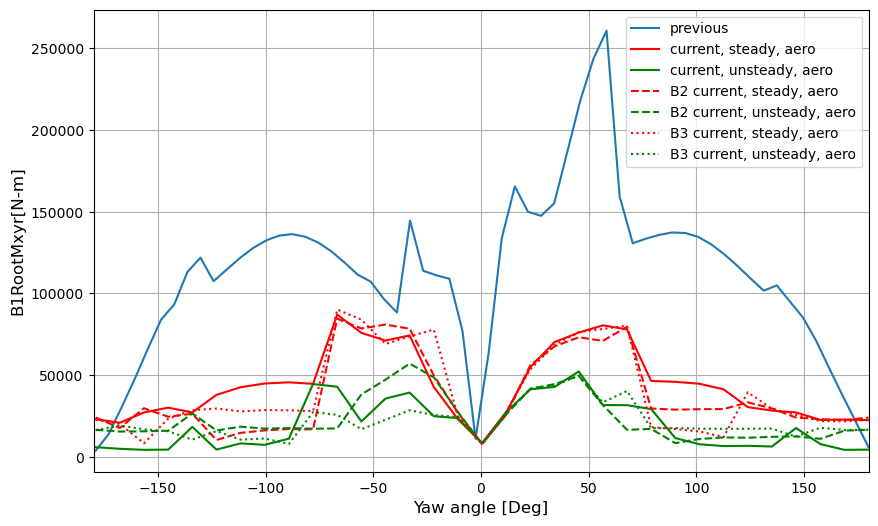

In [54]:
fig, axs = plt.subplots(1,1,figsize=(10,6), sharex=True)

plotScalingY = 1e-3

# signal strings
# 'TwrBsMxyt[kN-m]'    'YawBrMxyp[kN-m]'    'B1RootMxyr[N-m]'   'B2RootMxyr[N-m]'   'B3RootMxyr[N-m]'

signalString = 'B1RootMxyr[N-m]'
newScaling = 1e-3
oldString = 'RootMxyb1'

axs.plot(Typhoondamped['ElastoDyn']['NacYaw'][2:], Typhoondamped[oldString]['Mean'][2:], label='previous')


axs.plot(steadyData['NacYaw']['Max'], steadyData[signalString]['Mean'] * newScaling, 'r', label='current, steady, aero')
axs.plot(unsteadyData['NacYaw']['Max'], unsteadyData[signalString]['Mean'] * newScaling, 'g', label='current, unsteady, aero')

axs.plot(steadyData['NacYaw']['Max'], steadyData['B2RootMxyr[N-m]']['Mean'] * newScaling,'r--' , label='B2 current, steady, aero')
axs.plot(unsteadyData['NacYaw']['Max'], unsteadyData['B2RootMxyr[N-m]']['Mean'] * newScaling,'g--', label='B2 current, unsteady, aero')

axs.plot(steadyData['NacYaw']['Max'], steadyData['B3RootMxyr[N-m]']['Mean'] * newScaling,'r:', label='B3 current, steady, aero')
axs.plot(unsteadyData['NacYaw']['Max'], unsteadyData['B3RootMxyr[N-m]']['Mean'] * newScaling,'g:', label='B3 current, unsteady, aero')



axs.set_ylabel(signalString, fontsize=12)
axs.set_xlabel('Yaw angle [Deg]', fontsize=12)

axs.grid()
axs.set_xlim([-180,180])
axs.legend()